In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline

In [2]:
np.random.seed(42)
m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

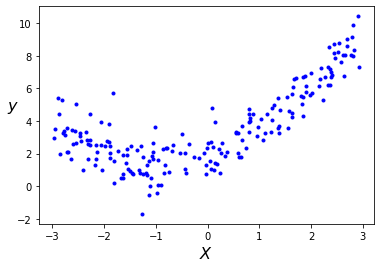

In [3]:
# Quadratic Data
plt.plot(X, y, 'b.')
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0);

In [4]:
permutations = np.random.permutation(X.shape[0])
X_shuffled, y_shuffled = X[permutations, :], y[permutations, :]

# Linear Regression

In [5]:
lin_reg = LinearRegression()

In [6]:
train_sizes, train_scores, val_scores = learning_curve(lin_reg, X_shuffled, y_shuffled,
                                                        train_sizes=np.linspace(1/160, 1, 160),
                                                       scoring = make_scorer(mean_squared_error))

C:\Users\ayh17\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1647: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 159 instead of 160.
  warnings.warn(


In [7]:
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

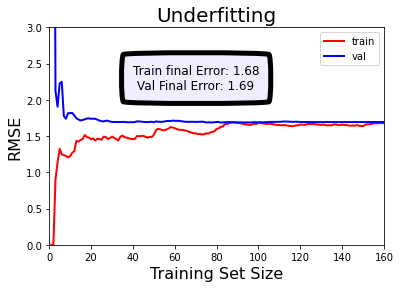

In [8]:
plt.plot(train_sizes, np.sqrt(train_scores_mean), 'r-', label='train', linewidth=2)
plt.plot(train_sizes, np.sqrt(val_scores_mean), 'b-', label='val', linewidth=2)
plt.axis([0, 160, 0, 3])
plt.xlabel('Training Set Size', fontsize=16)
plt.ylabel('RMSE', fontsize=16)
bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
plt.text(40, 2.3, 'Train final Error: {:0.2f}\n Val Final Error: {:0.2f}'.format(np.sqrt(train_scores_mean[-1]),
        np.sqrt(val_scores_mean[-1])), fontsize=12, va='center', bbox=bbox_props)
plt.legend()
plt.title('Underfitting', fontsize=20)
plt.savefig('images/learning_curves_underfit.jpg');

In [9]:
# Final Scores
print(f'Train final Error: {np.sqrt(train_scores_mean[-1])}')
print(f'Val final Error: {np.sqrt(val_scores_mean[-1])}')

Train final Error: 1.6772610882878953
Val final Error: 1.6940442352289278


The model is clearly **underfitting** the training data.

# Polynomial Regression

### 2nd Degree Polynomial

In [10]:
polynomial_regression_2 = Pipeline(steps = [
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

In [11]:
train_sizes, train_scores, val_scores = learning_curve(polynomial_regression_2, X_shuffled, y_shuffled,
                                                        train_sizes=np.linspace(1/160, 1, 160),
                                                       scoring = make_scorer(mean_squared_error))

C:\Users\ayh17\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1647: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 159 instead of 160.
  warnings.warn(


In [12]:
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

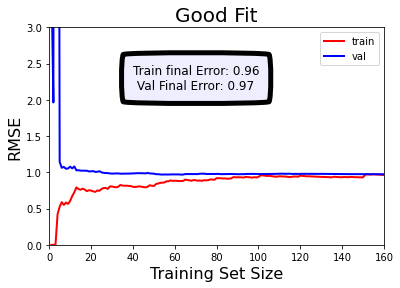

In [13]:
plt.plot(train_sizes, np.sqrt(train_scores_mean), 'r-', label='train', linewidth=2)
plt.plot(train_sizes, np.sqrt(val_scores_mean), 'b-', label='val', linewidth=2)
plt.axis([0, 160, 0, 3])
plt.xlabel('Training Set Size', fontsize=16)
plt.ylabel('RMSE', fontsize=16)
bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
plt.text(40, 2.3, 'Train final Error: {:0.2f}\n Val Final Error: {:0.2f}'.format(np.sqrt(train_scores_mean[-1]),
        np.sqrt(val_scores_mean[-1])), fontsize=12, va='center', bbox=bbox_props)
plt.title('Good Fit', fontsize=20)
plt.legend()
plt.savefig('images/learning_curves.jpg');

In [14]:
# Final Scores
print(f'Train final Error: {np.sqrt(train_scores_mean[-1])}')
print(f'Val final Error: {np.sqrt(val_scores_mean[-1])}')

Train final Error: 0.9629928538602109
Val final Error: 0.9735013470617006


**Good** fit.

### 10th Degree Polynomial

In [15]:
polynomial_regression_10 = Pipeline(steps = [
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('model', LinearRegression())
])

In [16]:
train_sizes, train_scores, val_scores = learning_curve(polynomial_regression_10, X_shuffled, y_shuffled,
                                                        train_sizes=np.linspace(1/160, 1, 160),
                                                       scoring = make_scorer(mean_squared_error))

C:\Users\ayh17\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1647: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 159 instead of 160.
  warnings.warn(


In [17]:
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

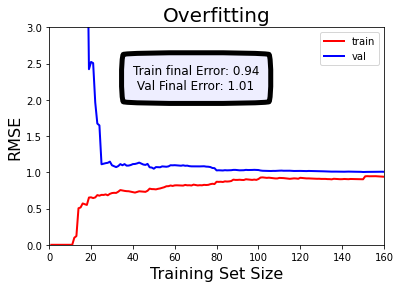

In [18]:
plt.plot(train_sizes, np.sqrt(train_scores_mean), 'r-', label='train', linewidth=2)
plt.plot(train_sizes, np.sqrt(val_scores_mean), 'b-', label='val', linewidth=2)
plt.axis([0, 160, 0, 3])
plt.xlabel('Training Set Size', fontsize=16)
plt.ylabel('RMSE', fontsize=16)
bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
plt.text(40, 2.3, 'Train final Error: {:0.2f}\n Val Final Error: {:0.2f}'.format(np.sqrt(train_scores_mean[-1]),
        np.sqrt(val_scores_mean[-1])), fontsize=12, va='center', bbox=bbox_props)
plt.title('Overfitting', fontsize=20)
plt.legend()
plt.savefig('images/learning_curves_overfit.jpg');

In [19]:
# Final Scores
print(f'Train final Error: {np.sqrt(train_scores_mean[-1])}')
print(f'Val final Error: {np.sqrt(val_scores_mean[-1])}')

Train final Error: 0.9389156816722789
Val final Error: 1.007104601581117
